# Regressão logística

Vamos agora considerar o problema de *classificar* um conjunto de pessoas em adolescente ou adulto dependendo da altura.

Para entender melhor os conceitos teóricos associados com este notebook, leia a Seção 1.1 das [notas de aula](<../Notas de Aula.pdf>)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch

### Leitura dos dados

In [4]:
data = torch.from_numpy(np.loadtxt("age_data_3.txt"))
x, targets = data.T

print(x)

tensor([1.3800, 1.2400, 1.3000, 1.4200, 1.3900, 1.1000, 1.3000, 1.1800, 1.1900,
        1.2400, 1.2100, 1.3500, 1.2800, 1.2100, 1.2400, 1.2300, 1.3500, 1.1800,
        1.2300, 1.1100, 0.9400, 1.2700, 1.2900, 1.1300, 1.4300, 1.0500, 1.2000,
        1.1800, 1.3500, 1.3500, 1.2200, 1.2400, 1.1100, 1.0000, 1.1700, 1.2200,
        1.3200, 1.3200, 1.1600, 1.1700, 1.1000, 1.0600, 1.0300, 1.4000, 1.1500,
        1.1600, 1.0700, 1.2800, 1.0400, 1.1800, 1.1100, 1.2400, 1.1500, 1.0800,
        1.2000, 1.2400, 1.2100, 1.2300, 1.1400, 1.1600, 1.1300, 1.1600, 1.1200,
        1.0300, 1.2200, 1.1600, 1.0400, 1.2500, 1.1100, 1.2100, 1.2700, 1.2100,
        1.3100, 1.0800, 1.2400, 1.1300, 1.1100, 1.1400, 1.1700, 1.2100, 1.0800,
        1.2900, 1.2500, 1.0500, 1.3500, 1.3900, 1.3200, 1.1800, 1.0900, 1.3100,
        1.1600, 1.3200, 1.2200, 1.3000, 1.2400, 1.2700, 1.2000, 1.3800, 1.2100,
        1.2400, 1.9800, 1.3300, 1.3500, 1.7900, 1.3700, 1.9900, 1.5200, 1.4500,
        1.9800, 1.9000, 1.9700, 1.7800, 

In [5]:
print(targets)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1.], dtype=torch.float64)


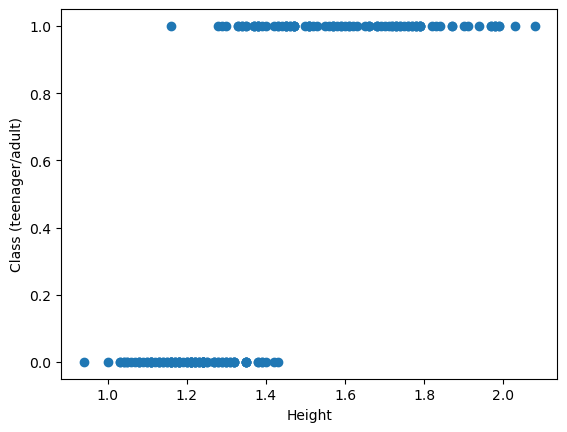

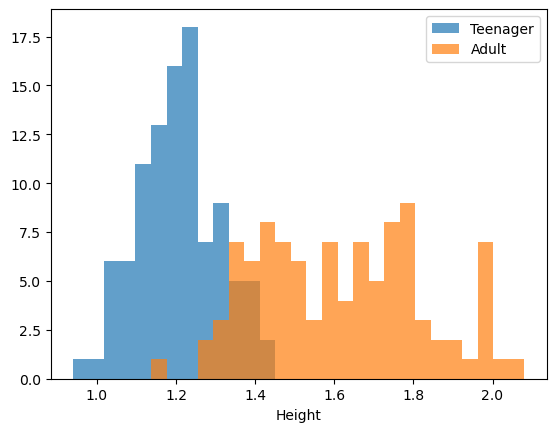

In [ ]:
plt.scatter(x, targets) #ALTURA DA PESSOAS EM RELAÇÃO A CLASSE ADULTO OU ADOLESCENTE
plt.xlabel("Height")
plt.ylabel("Class (teenager/adult)")

bins = np.linspace(x.min(), x.max(), 30) #dividir em bins para o tamanho das colunas serem iguais na visualização
plt.figure()
plt.hist(x[targets==0], bins, alpha=0.7)
plt.hist(x[targets==1], bins, alpha=0.7)
plt.xlabel("Height")
plt.legend(("Teenager", "Adult"))

### Modelo linear

Definiremos um modelo linear que possui um único valor como saída para cada valor de entrada. Uma função sigmóide é aplicada na saída do modelo para transformar os valores em probabilidades.

Incrementaremos nosso modelo em relação ao do notebook anterior para seguir a API do Pytorch que utilizaremos nas próximas aulas.

In [ ]:
class Model:

    def __init__(self, a, b, requires_grad=False):

        # Parâmetros do modelo
        self.a = torch.tensor(a, requires_grad=requires_grad) #requires_grad para possibilitar o calculo de gradientes com o tensor
        self.b = torch.tensor(b, requires_grad=requires_grad)

    def __call__(self, x): #função dunder que gera o Y na chamada do objeto do modelo
        y = self.a*x + self.b
        return  y
    
    def parameters(self):
        """Retorna os parâmetros do modelo."""
        return self.a, self.b

    def zero_grad(self):
        """Remove os gradientes anteriormente calculados."""
        for p in self.parameters():
            p.grad = None    
    
def sigmoid(x):
    """Recebe um valor qualquer e transforma ele para o intervalo [0,1]."""
    y = 1/(1+torch.exp(-x))
    return y

model = Model(19., -25.) #passando os parametros a e b da função linear.
scores = model(x) 

print(scores)



tensor([ 1.2200, -1.4400, -0.3000,  1.9800,  1.4100, -4.1000, -0.3000, -2.5800,
        -2.3900, -1.4400, -2.0100,  0.6500, -0.6800, -2.0100, -1.4400, -1.6300,
         0.6500, -2.5800, -1.6300, -3.9100, -7.1400, -0.8700, -0.4900, -3.5300,
         2.1700, -5.0500, -2.2000, -2.5800,  0.6500,  0.6500, -1.8200, -1.4400,
        -3.9100, -6.0000, -2.7700, -1.8200,  0.0800,  0.0800, -2.9600, -2.7700,
        -4.1000, -4.8600, -5.4300,  1.6000, -3.1500, -2.9600, -4.6700, -0.6800,
        -5.2400, -2.5800, -3.9100, -1.4400, -3.1500, -4.4800, -2.2000, -1.4400,
        -2.0100, -1.6300, -3.3400, -2.9600, -3.5300, -2.9600, -3.7200, -5.4300,
        -1.8200, -2.9600, -5.2400, -1.2500, -3.9100, -2.0100, -0.8700, -2.0100,
        -0.1100, -4.4800, -1.4400, -3.5300, -3.9100, -3.3400, -2.7700, -2.0100,
        -4.4800, -0.4900, -1.2500, -5.0500,  0.6500,  1.4100,  0.0800, -2.5800,
        -4.2900, -0.1100, -2.9600,  0.0800, -1.8200, -0.3000, -1.4400, -0.8700,
        -2.2000,  1.2200, -2.0100, -1.44

In [11]:
# Probabilidade de cada pessoa ser adulta
probs = sigmoid(scores)

print(probs)

tensor([7.7206e-01, 1.9155e-01, 4.2556e-01, 8.7868e-01, 8.0377e-01, 1.6302e-02,
        4.2556e-01, 7.0437e-02, 8.3938e-02, 1.9155e-01, 1.1816e-01, 6.5701e-01,
        3.3626e-01, 1.1816e-01, 1.9155e-01, 1.6383e-01, 6.5701e-01, 7.0437e-02,
        1.6383e-01, 1.9647e-02, 7.9212e-04, 2.9525e-01, 3.7989e-01, 2.8471e-02,
        8.9752e-01, 6.3685e-03, 9.9750e-02, 7.0437e-02, 6.5701e-01, 6.5701e-01,
        1.3943e-01, 1.9155e-01, 1.9647e-02, 2.4726e-03, 5.8967e-02, 1.3943e-01,
        5.1999e-01, 5.1999e-01, 4.9266e-02, 5.8967e-02, 1.6302e-02, 7.6909e-03,
        4.3640e-03, 8.3202e-01, 4.1091e-02, 4.9266e-02, 9.2852e-03, 3.3626e-01,
        5.2723e-03, 7.0437e-02, 1.9647e-02, 1.9155e-01, 4.1091e-02, 1.1206e-02,
        9.9750e-02, 1.9155e-01, 1.1816e-01, 1.6383e-01, 3.4224e-02, 4.9266e-02,
        2.8471e-02, 4.9266e-02, 2.3661e-02, 4.3640e-03, 1.3943e-01, 4.9266e-02,
        5.2723e-03, 2.2270e-01, 1.9647e-02, 1.1816e-01, 2.9525e-01, 1.1816e-01,
        4.7253e-01, 1.1206e-02, 1.9155e-

Text(0, 0.5, 'P(Adult|Height)')

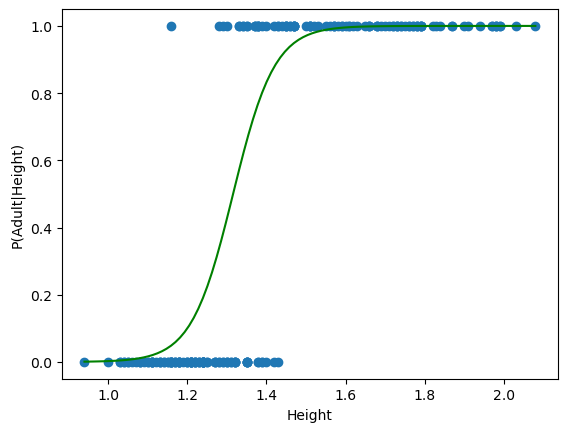

In [12]:

# Cálculo das probabilidades para todas as possíveis entradas x
inputsm = torch.linspace(x.min(), x.max(), 100) 
#Gerando os scores de Y para cada entrada
scoresm = model(inputsm)
#Transformando os scores em probabilidade
probsm = sigmoid(scoresm)

plt.scatter(x, targets)
plt.plot(inputsm, probsm, c="g")
plt.xlabel("Height")
plt.ylabel("P(Adult|Height)")

Os valores de saída do modelo (após a aplicação da sigmóide) podem ser interpretados como a probabilidade de cada item pertencer à classe *Adulto*. 

In [13]:
#Acurácia do modelo
def acc(preds, targets):
    return torch.sum(preds==targets)/len(targets)

preds = probs>0.5
acc(preds, targets)

tensor(0.9000)

### Função de verossimilhança e entropia cruzada

Ao rotularmos os dados como classe 0 e 1, estamos dizendo que temos 100% de certeza que esses dados estão nessas classes. Portanto, na ausência de qualquer outra informação sobre os dados, o melhor modelo que podemos desenvolver para o conjunto de treinamento é tal que:

* Quando o item é da classe 0, o modelo tem como resultado P(Adult|Height)=0.0
* Quando o item é da classe 1, o modelo tem como resultado P(Adult|Height)=1.0

A função de verossimilhança e a entropia cruzada quantificam o grau de aderência do modelo a essa hipótese.

In [14]:
def prob_of_target(probs, targets):
    """Retorna as probabilidades da classe esperada. Equivalente a
    probs_target = torch.zeros(len(probs))
    for idx, (prob, targ) in enumerate(zip(probs, targets)): #Os tensores target e prob devem ser identificos em estrutura
        if targ==0:
            probs_target[idx] = 1-prob #pois o modelo da probabilidade para a classe 1. Logo, caso o target daquele dado em questão era pra ser 0, 1 é subtraido da prob. O resto é pegado
        else:
            probs_target[idx] = prob
    """
    return probs*targets + (1-probs)*(1-targets)

def likelihood(probs, targets):
    """Função de verossimilhança."""
    probs_correct = prob_of_target(probs, targets)
    return torch.prod(probs_correct) #Gera o produto do tensor com as probabilidades

print(likelihood(probs, targets))

tensor(2.2591e-20, dtype=torch.float64)


Se o nosso modelo fosse perfeito (retornasse 0 para itens da classe 0 e 1 para itens da classe 1), a função `likelihood` acima retornaria o valor 1. 

É mais comum utilizar a função *negative log-likelihood* para evitar valores muito pequenos:

In [15]:
def nll(probs, targets):
    """Negativo do logaritmo da função de verossimilhança"""
    probs_correct = prob_of_target(probs, targets)
    probs_log = torch.log(probs_correct)
    return -torch.sum(probs_log)

nll(probs, targets)

tensor(45.2367, dtype=torch.float64)

Nesse caso, a função `nll` daria o valor 0 (logaritmo do valor 1) para o modelo perfeito.

Para o problema de classificação que estamos estudando, uma função equivalente à `nll` é a entropia cruzada. No Pytorch, ela recebe como entrada o resultado da rede, e não as probabilidades. A função também retorna a média dos valores ao invés da soma. Então implementaremos ela dessa forma:

In [16]:
def cross_entropy(scores, targets):
    
    probs = sigmoid(scores)
    probs_correct = prob_of_target(probs, targets)
    probs_log = torch.log(probs_correct)

    return -torch.mean(probs_log)

cross_entropy(scores, targets)

tensor(0.2262, dtype=torch.float64)

### Otimização do modelo

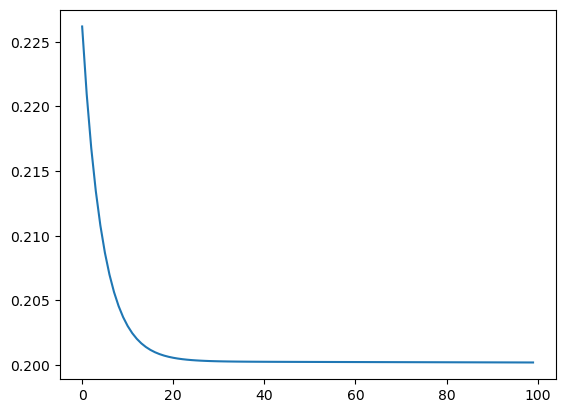

In [17]:
def step(model, x, targets, lr):

    # Apaga os gradientes
    model.zero_grad()
    scores = model(x)
    loss = cross_entropy(scores, targets)
    # Calcula os gradientes
    loss.backward()
    # Atualiza os gradientes
    with torch.no_grad():
        for p in model.parameters():
            p -= lr*p.grad

    return loss.item()

model = Model(19., -25., requires_grad=True)

num_epochs = 100
lr = 0.5
losses = []
for epoch in range(0, num_epochs):
    loss = step(model, x, targets, lr)
    losses.append(loss)

plt.plot(losses)